# <font color =#d14d0f>[ES-21AC] State Prisons and County Jails</font>
### Part Two

***

### Professor: Victoria Robinson 
### Data Science Fellow: Phillip Pierini

The goal of this project is for students to understand that they can do social work using data. This notebook continues the exploration into incarceration trends and impacts of prison realignment in California.

*Estimated Time: 45 minutes*

---

### Table of Contents

[THE DATA](#sectiondata)<br>


[CONTEXT](#sectioncontext)<br>


[JAILS](#section1)<br>

1. [DATA](#subsection1)<br>
2. [DATA ANALYSIS](#subsection2)<br>
3. [GENERAL:SENTENCED & UNSENTENCED](#subsection3)<br>
4. [GENDER DIVISION](#subsection4)<br>

[Final Survey](#section2)<br>

---

**Please run the cell below before you begin.** It will load libraries needed to continue analyzing our data!

**Dependencies:**

In [3]:
from datascience import * # This loads tools from the datascience library
import numpy as np # Loads numerical methods

from otter import Notebook # This will allow us to export your responses as a pdf

import matplotlib  # This loads some visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # This selects a certain 'style' for our graphs

import ipywidgets as widgets # Loads a widgets library that will allow for interactive learning

## <font color =#d14d0f>The Data</font> <a id='sectiondata'></a>
---

In this notebook, you will use data from the Jail Profile Survey provided by the Board of State and Community Corrections (BSCC). 


The Jail Profile Survey releases reports on data recorded by local agencies. Some of the information we will find here include the total number of unsentenced and sentenced males and females in each of these facilities. This data has been used to determine the needs of each of these counties when determining the distribution of state bond monies and future projections for other jail needs.

If you are interested in learning more please visit:

[Jail Profile Survey](http://www.bscc.ca.gov/downloads/JPSWorkbook.pdf) 

[Jail Profile Survey data](https://app.bscc.ca.gov/joq//jps/QuerySelection.asp)


## <font color =#d14d0f>Context</font>  <a id='sectioncontext'></a>
---

Throughout the course, we have learned about the policies of realignment, incarceration, and crime trends in California. By exploring these data sets we hope to obtain a clearer picture of the magnitude of prison and county jail overcrowding per facility and region, and the effects of realignment policies on state prisons and county jails.

To review, the key difference between state prisons and jails involve the process of sentencing. Prisons are designed for long term sentences, while jails are for those who are unsentenced or have short term sentences. It is important to note that short-term sentences are generally one year or less. Another difference is that prisons are larger and controlled at the state level. In contrast, jails are smaller and handled by a city or county.

The relationship between the two institutions is emphasized by mass incarceration. Through this activity, we will analyze how overcrowding within California’s state prisons influenced the size of jail populations after realignment policies were implemented.

## <font color =#d14d0f>Jails</font> <a id='section1'></a>
---
To observe how realignment influenced California's jails, we obtained data from 1996 to 2018, so that we could understand the trend over time. We will start by observing California's state prisons using the data we found through the BSCC.

### **Data**

#### Data Dictionary
Below you will find a data dictionary for future reference. This data dictionary goes over what the column names represent in the data we will load below.

|Column Name   | Description |
|--------------|---------|
|Jurisdiction | The unit of government that has legal authority over an inmate (state or federal)|
|Facility | Name of the county jail |
|Year |Year that the data was collected |
|Month | Month that the data was collected |
|Unsentenced males| Non-sentenced inmates are all inmates other than those who have been sentenced on all charges pending * ** |
|Unsentenced females| Non-sentenced inmates are all inmates other than those who have been sentenced on all charges pending * **|
|Sentenced males| Sentenced inmates are those who have been sentenced on all charges and are no longer on trial. This category includes inmates who are being incarcerated pending or during an appeal. * |
|Sentenced females|Sentenced inmates are those who have been sentenced on all charges and are no longer on trial. This category includes inmates who are being incarcerated pending or during an appeal. * |
|Total facility ADP| ADP Total should include all inmates (including those under contract from any agency/jurisdiction) assigned to all single/double and multiple occupancy cells, administrative segregation, disciplinary isolation, and medical and mental health beds.|


**Please note the following:**

\* Note that the counts for sentenced and unsentences male/female inmates is an *average daily population (ADP)* for the given month.


** For example, if an inmate has been sentenced on three charges but is still being tried on a fourth charge, they should be reported as “non-sentenced.”

** If an inmate is found not to be competent for trial and is detained in a county jail facility, count them in Non-Sentenced (Male/Female & Misdemeanor/Felony). If they are detained in the state hospital, do not count them in any category.

#### Importing the Data

Let's start off by importing our jails data into our Jupyter Notebook. As a refresher, we do this by creating an instance of a table (`Table()`) and populating it with our data which we read in from a location within our folders. It takes in a file and reads and outputs it as a table for our use here!

In [4]:
jail = Table().read_table("data/jails_cleaned.csv")

Now that we've assigned it to a variable for future use, let's see the first five entries.

In [5]:
jail.show(5)

Unnamed: 0,Jurisdiction,Facility,Year,Month,Unsentenced males,Unsentenced females,Sentenced males,Sentenced females,Total facility ADP
0,Alameda Sheriff's Dept.,Glen Dyer Jail,1995,10,539,1,143,0,683
1,Alameda Sheriff's Dept.,Santa Rita Jail,1995,10,1983,197,887,166,3233
2,Amador Sheriff's Dept.,Amador County Jail,1995,10,15.33,1.59,21.7,4.85,43.47
3,Butte Sheriff's Dept.,Butte County Jail,1995,10,225,39,158,15,437
4,Calaveras Sheriff's Dept.,Calaveras County Jail,1995,10,20.8,0.4,29.6,3.9,54.7


### **Data Analysis**
Before we begin, please note the following:
1. Throughout the notebook you will encounter ellipsis (`...`) This is an indication that you need to replace the `...` with your code.
2. Questions that are to be answered are clearly marked with <font color = #d14d0f>**bold orange text**</font>. At the end of this notebook, we will run a command that will export all your answers into a pdf. If you would like, you are also more than welcome to write your answers on a separate google or word document!

Just as we did in our first Prisons notebook, the first thing we want to do is check that the number of months does not exceed 276.

<font color = #d14d0f>**Question 1a)**</font> Group by `Facility` using the `group()` table function.

In [6]:
# Replace the ellipsis below
jail_grouped = jail.group("Facility")
jail_grouped

Facility,count
Amador County Jail,276
Barrett Honor Camp / Barrett Juvenile,69
Biscailuz Recovery Center,24
Blythe Jail,276
Bob Wiley Detention Facility,276
Butte County Jail,276
Calaveras Co. Adult Detention Facility,52
Calaveras County Jail,224
Camp West Fork,69
Central Receiving Facility,195


Now that you have grouped by facility, we see that the group function produced a two-column table with unique facility names and the number of times each occurred in our table.

<font color = #d14d0f>**Question 1b)**</font> Sort by `count` using the `sort()` table function and set descending to True.

In [9]:
# Replace the ellipsis below
jail_grouped.sort('count', descending = True)

Facility,count
Yuba County Jail,276
West Valley Detention Center,276
West County Detention Facility,276
Wayne Brown Correctional Facility,276
Vista Facility,276
Tuolumne County Jail,276
Tulare County Jail,276
Trinity Co. Detention Facility,276
Theo Lacy,276
Tehama County Jail,276


Do you see any count abnormalities? In contrast to our Prisons notebook, there do not seem to be any issues with the counts!

In the table above, we produced a table with a row entry for each month in a given year for 23 years for each jail. Like we did in our previous notebook, we want to get the **yearly total for each institution** to explore how this total number of inmates in the jail population changed over time. To accomplish this, the first thing we need to do is aggregate or group some columns.

Our first step is to select the appropriate columns. We select the columns 'Year', 'Unsentenced males', 'Unsentenced females', 'Sentenced males', 'Sentenced females', and 'Total facility ADP' using the `select()` function.

Next we want to store this as a new variable for future use. We assign this new table to a variable called `data_year`.

In [14]:
data_year= jail.select('Year','Unsentenced males', 'Unsentenced females','Sentenced males','Sentenced females', 'Total facility ADP')

<font color = #d14d0f>**Question 2)**</font> If we want to obtain yearly totals for each institution, what should we group by in the code below?

In [15]:
# Replace the ellipsis with your code
data_year = data_year.group("Year", sum)
data_year.show(5)

Year,Unsentenced males sum,Unsentenced females sum,Sentenced males sum,Sentenced females sum,Total facility ADP sum
1995,111311,13430.4,73436.1,11201.6,209225
1996,444830,55555.7,300297,44444.9,845128
1997,461675,64381.5,326194,52028.7,904279
1998,469013,66372.2,337045,58904.8,931335
1999,463570,63054.8,316691,54883.7,898199


Our next step is to plot the trend year by year. Oftentimes it is much more useful to visually inspect data as it can reveal trends that are otherwise not easily seen in tables. Our first investigation will be into the total facility ADP over the years.

As a refresher for plots, remember to use the `plot(x, y)` table function. Where the `x` and `y` represent two column names that you would like to plot along the x and y axis respectively. We then append this to our table's name using dot notation. This tells the computer in which table to look for those columns.

<font color = #d14d0f>**Question 3)**</font> Plot `Total facility ADP sum` over time. We also ask that you label your axes. We have included a descriptive title for you!

Hint: Think about what two column names are relevant to this goal. Do not forget to write the column names inside quotations!

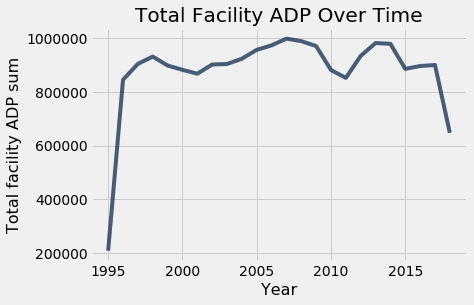

In [17]:
# Replace the ellipsis with your code
data_year.plot("Year","Total facility ADP sum")

plt.xlabel("Year")
plt.ylabel("Total facility ADP sum")
plt.title("Total Facility ADP Over Time");

For the remainder of the notebook, we will focus on years that mark significant shifts in population among jails. We will focus mainly on 2011 and 2014 by plotting red dots to mark those years in cells below.

First, let's obtain the data where the year equals 2011. To do this we will use the `where()` table function to limit our data to the year 2011 and assign it to a new variable `data2011`.

In [18]:
data2011 = data_year.where("Year", 2011)

data2011.show()

Year,Unsentenced males sum,Unsentenced females sum,Sentenced males sum,Sentenced females sum,Total facility ADP sum
2011,529898,66688,216112,39530.7,852229


Note that we are only interested in the last column, 'Total facility ADP sum' and the year. Let's run a few more commands to assign the values in these two columns as our x and y coordinates for our first red dot.

In [19]:
x_coordinate_2011 = data2011.column('Year')
y_coordinate_2011 = data2011.column('Total facility ADP sum')

Now it's your turn!

<font color = #d14d0f>**Question 4a)**</font> Filter your data to the year 2014 following a similar process as above.

In [21]:
# Replace the ellipsis with your code
data2014 = data_year.where('Year', 2014)

<font color = #d14d0f>**Question 4b)**</font> Save the value in the `Year` column as your 2014 x_coordinate. Repeat the process for `Total facility ADP sum` and save it as your 2014 y_coordinate.

In [22]:
# Replace the ellipsis with your code
x_coordinate_2014 = data2014.column("Year")
y_coordinate_2014 = data2014.column("Total facility ADP sum")

Now we can add these data points as red dots on our plot! There's no need to edit the cell below, simply run it.

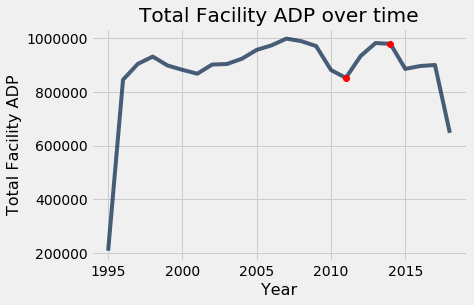

In [23]:
data_year.plot("Year", "Total facility ADP sum")
plt.xlabel("Year")
plt.ylabel("Total Facility ADP")
plt.title("Total Facility ADP over time")

plt.plot(x_coordinate_2011, y_coordinate_2011, 'ro')
plt.plot(x_coordinate_2014, y_coordinate_2014, 'ro');

<font color = #d14d0f>**Question 5)**</font> In looking at the graph you produced, how does it reflect the systematic changes of California's potential jail population? Name a court case that is represented by a red dot in your plot.

*Replace this text with your response!*

### **General: Designed and Staffed Capacity**
In this section we revisit designed and staffed capacities. We will go ahead and compare the sentenced and unsentences populations for county jails. We will specifically be creating and looking at the following comparisons:
* Overall (male and female) sentenced and (male and female) unsentenced
* Male unsentenced vs male sentenced
* Female unsentenced vs female sentenced

#### General: Sentenced vs Unsentenced

To understand how sentenced vs unsentenced jail populations have changed over time, we will need to estimate the totals for each of these two categories. In looking at our data set we can notice that is is composed of 4 main columns, however none displays the total for these categories. 

|Sentenced males|Sentenced females|Unsentenced males| Unsentenced females|Total facility ADP|
|--------------|---------|------|----------|-----|

Therefore, we begin by calculating the sentenced total and the unsentenced total. We will need to combine male and female data for each of these two categories.

Let's begin by separating each column into a new variable so that we can easily extract and later combine the values that we need. As a refresher, you can use the table function `column()` to select the values in a given column.

First, we select all the values for male sentenced and female sentenced and save it into new variables `m_sentenced` and `f_sentenced` respectively.

In [24]:
m_sentenced = data_year.column("Sentenced males sum")
f_sentenced = data_year.column("Sentenced females sum")

Your turn!

<font color = #d14d0f>**Question 6a)**</font> Repeat the procedure above, but now selected the columns for **unsentenced** males and females, and save them into new variables `m_unsentenced` and `f_unsentenced` respectively.

In [25]:
# Replace the ellipsis with your code

m_unsentenced = data_year.column("Unsentenced males sum")
f_unsentenced = data_year.column("Unsentenced females sum")

Now that we've saved all the relevant variables, let's see what `m_sentenced` looks like!

In [26]:
m_sentenced

array([ 73436.08 , 300297.38 , 326194.31 , 337044.85 , 316690.99 ,
       299153.69 , 286330.37 , 290729.   , 270378.   , 270068.   ,
       270333.3  , 268577.3  , 270261.21 , 266175.95 , 269144.37 ,
       217504.53 , 216111.596, 293155.81 , 310666.   , 311722.26 ,
       278837.77 , 267471.185, 269771.29 ,        nan])

It looks like a list of numbers! This means that we can add the values from `m_sentenced` and `f_sentenced` into a single column to get the total sentenced per year.

In [27]:
sentenced_all =  m_sentenced + f_sentenced

<font color = #d14d0f>**Question 6b)**</font> Add `m_unsentenced` and`f_unsentenced` together and assign the sum to a new variable and call it `unsentenced_all`.

In [28]:
# Replace the ellipsis with your code

unsentenced_all = m_unsentenced + f_unsentenced 

We can now go ahead and add these two values to our original data table (called `data_year`). We will use the table function `with_column()` which takes in a label for your column, and the values that you want to assign to that new column.

In [29]:
data_year = data_year.with_column("Total Sentenced", sentenced_all)

<font color = #d14d0f>**Question 6c)**</font> Now it's your turn to add the list of values in `unsentenced_all`. Name the new column `Total Unsentenced`.

In [30]:
# Replace the ellipsis with your code

data_year = data_year.with_column("Total Unsentenced", unsentenced_all)

Now let's look at our table to ensure that everything is in order. Use the `show` function to view the first 5 rows of your new table.

In [31]:
data_year.show(5)

Year,Unsentenced males sum,Unsentenced females sum,Sentenced males sum,Sentenced females sum,Total facility ADP sum,Total Sentenced,Total Unsentenced
1995,111311,13430.4,73436.1,11201.6,209225,84637.7,124742
1996,444830,55555.7,300297,44444.9,845128,344742,500385
1997,461675,64381.5,326194,52028.7,904279,378223,526056
1998,469013,66372.2,337045,58904.8,931335,395950,535386
1999,463570,63054.8,316691,54883.7,898199,371575,526624


In the following cell, we will select the necessary columns to plot both sentenced and unsentenced totals over time.

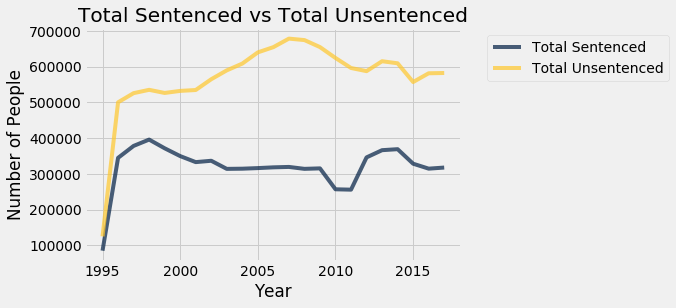

In [32]:
totals = data_year.select("Year", "Total Sentenced", "Total Unsentenced")

# Now to plot our data!
totals.plot("Year")

plt.title("Total Sentenced vs Total Unsentenced")
plt.xlabel("Year")
plt.ylabel("Number of People");

<font color = #d14d0f>**Question 7)**</font> Do you notice anything interesting about this visualization we just plotted?. What do you notice about the difference in the two lines before the year 2000? Do you notice anything interesting after 2010?

*Replace this text with your response!*

---
Now let's explore this same data, but as **percentages**. Think about why we might want to work with percentages. Our end goal here will be to plot percent ADP over time.

To do this, we can get our total using the column `Total facility ADP sum` and then divide the total sentenced and total unsentenced by this value. 

In [33]:
total_adp = data_year.column("Total facility ADP sum")

sent_percent = sentenced_all / total_adp * 100
unsent_percent = unsentenced_all / total_adp * 100

Great! Now that we have our percentages, let's repeat the same process as above to add these new percentage values to our `data_year` table and select the relevant columns that we want in order to plot percent ADP over time.

In [34]:
data_year = data_year.with_column("Total Sentenced Percent", sent_percent)
data_year = data_year.with_column("Total Unsentenced Percent", unsent_percent)

percent_totals = data_year.select("Year", "Total Sentenced Percent", "Total Unsentenced Percent")
percent_totals

Year,Total Sentenced Percent,Total Unsentenced Percent
1995,40.4529,59.6207
1996,40.7917,59.2083
1997,41.8259,58.1741
1998,42.5142,57.4858
1999,41.3689,58.6311
2000,39.6463,60.3537
2001,38.3581,61.642
2002,37.3311,62.669
2003,34.7304,65.2696
2004,34.0513,65.9487


Now let's plot this data using our same line plot method as before!

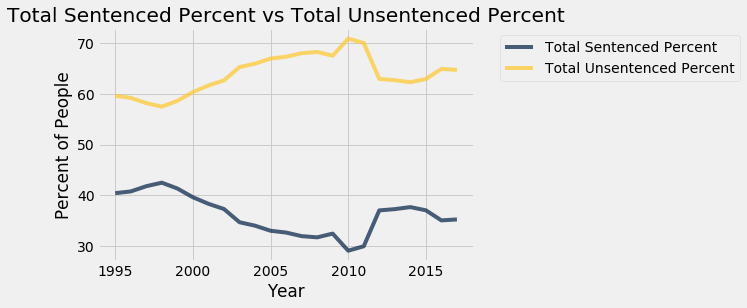

In [35]:
percent_totals.plot("Year")
plt.title("Total Sentenced Percent vs Total Unsentenced Percent")
plt.xlabel("Year")
plt.ylabel("Percent of People");

Similar to above, let's try plotting dots so we can see what happened at specific years in the jails, namely, 2011 and 2014. Let's see how these specific years play out on our plot above by plotting red dots representing those years.

First, let's start off by getting the data in the years 2011 and 2014.

In [36]:
data2011 = percent_totals.where("Year", 2011)
data2014 = percent_totals.where("Year", 2014)

Next, we want to get the x and y coordinates of each point using the data we just found. For example, using data2011, can now assign x_coordinate2011 to the year column and the y_coordinate2011 to the Percent column.

In [37]:
x_coordinate2011 = data2011.column('Year')
y_coordinate2011 = data2011.column("Total Sentenced Percent")

<font color = #d14d0f>**Question 8a)**</font>  Now, repeat this procedure for the year 2014. 

In [38]:
# Replace the ellipsis with your code

x_coordinate2014 = data2014.column("Year")
y_coordinate2014 = data2014.column("Total Sentenced Percent")

<font color = #d14d0f>**Question 8b)**</font> Now that you've calculated the coordinates in 2011 and 2014 for *sentenced* percents, let's repeat the same process for *unsentenced* percents.

In [39]:
# Replace the ellipsis with your code

x_coordinate2011_un = data2011.column("Year")
y_coordinate2011_un = data2011.column("Total Unsentenced Percent")

x_coordinate2014_un = data2014.column("Year")
y_coordinate2014_un = data2014.column("Total Unsentenced Percent")

Finally we add our points to our plot by running the cell below!

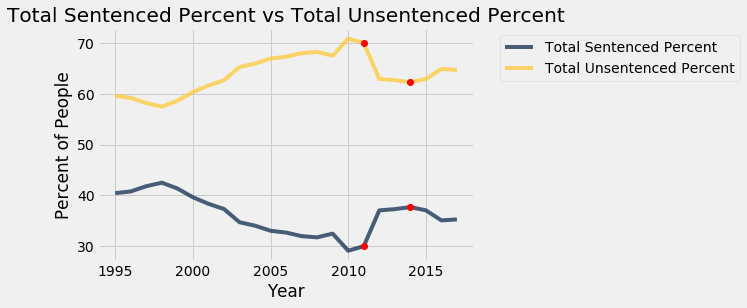

In [40]:
percent_totals.plot("Year")
plt.title("Total Sentenced Percent vs Total Unsentenced Percent")
plt.xlabel("Year")
plt.ylabel("Percent of People")

plt.plot(x_coordinate2011, y_coordinate2011, 'ro')
plt.plot(x_coordinate2014, y_coordinate2014, 'ro')
plt.plot(x_coordinate2011_un, y_coordinate2011_un, 'ro')
plt.plot(x_coordinate2014_un, y_coordinate2014_un, 'ro');

<font color = #d14d0f>**Question 9)**</font> Is there anything interesting that you see related to the percentages and years? How does looking at percentages and numbers compare?

*Replace this text with your response!*

### **Gender Divison**

#### Sentenced vs Unsentenced

We just looked at the total number of people who were sentenced and the total number of people who were unsentenced by year. Next, let's look at just the number of **males who were sentenced vs the number of males who were unsentenced**. Let's start by selecting the relevant columns that we are going to use for our analysis.

In [41]:
males = data_year.select("Year", "Sentenced males sum", "Unsentenced males sum")
males.show(5)

Year,Sentenced males sum,Unsentenced males sum
1995,73436.1,111311
1996,300297,444830
1997,326194,461675
1998,337045,469013
1999,316691,463570


We can now use these columns and plot the total number of males sentenced and unsentenced per year.

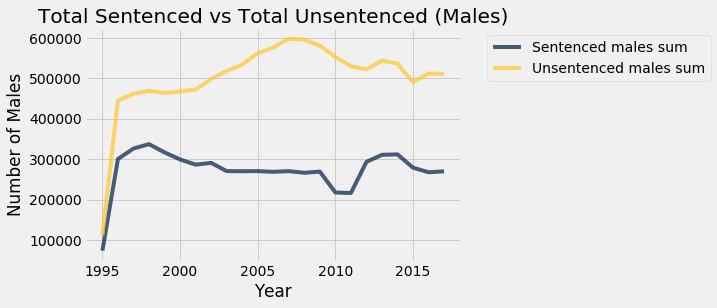

In [42]:
males.plot("Year")

plt.title("Total Sentenced vs Total Unsentenced (Males)")
plt.xlabel("Year")
plt.ylabel("Number of Males");

We have found and plotted the counts of males but let's try finding the **percentage** of males from the total ADP count. Start by getting the sum of the sentenced males column, the sum of the unsentenced males column, and then dividing both of these columns by the total ADP.

Hint: See if you can use a variable from earlier analysis!

As a challenge, try coding the above process yourself in a blank code cell below. Otherwise, run the cell below that!

In [ ]:
# An empty code cell for your challenge should you choose to accept it.


In [43]:
male_sent = males.column("Sentenced males sum")
male_unsent = males.column("Unsentenced males sum")

m_sent_percent = male_sent / total_adp * 100
m_unsent_percent = male_unsent / total_adp * 100

Let's add these new percentage columns to our male table and then select the appropriate columns for plotting.

In [44]:
males = males.with_column("Total Male Sentenced Percent", m_sent_percent)
males = males.with_column("Total Male Unsentenced Percent", m_unsent_percent)
m_percent_totals = males.select("Year", "Total Male Sentenced Percent", "Total Male Unsentenced Percent")

m_percent_totals

Year,Total Male Sentenced Percent,Total Male Unsentenced Percent
1995,35.099,53.2016
1996,35.5328,52.6346
1997,36.0723,51.0544
1998,36.1894,50.3593
1999,35.2584,51.611
2000,33.9134,52.9598
2001,32.9984,54.4064
2002,32.2428,55.249
2003,29.9154,57.3349
2004,29.2501,57.828


Now let us plot the **percentage** of males who were sentenced vs the percentage of males who were unsentenced.

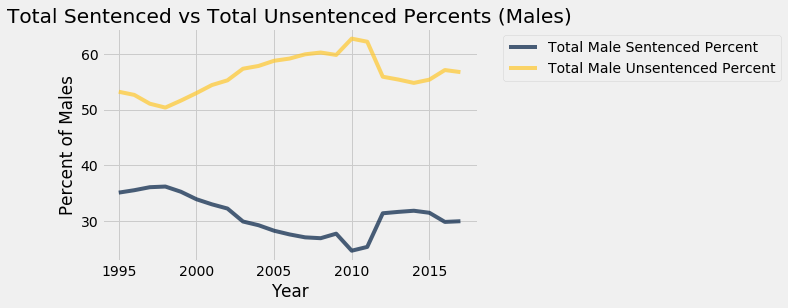

In [45]:
m_percent_totals.plot("Year")

plt.title("Total Sentenced vs Total Unsentenced Percents (Males)")
plt.xlabel("Year")
plt.ylabel("Percent of Males");

What's the next step? Adding the red dots! Now that you are more familiar with the process, we will allow for more coding below by outlining the steps in the comments.

<font color = #d14d0f>**Optional Challenge)**</font> Complete the entire process that ends in the creation of two red markers for the years 2011 and 2014. Otherwise, we will have a code cell further down will all the code filled in.

In [ ]:
# STEP ONE: Filter data
# STEP TWO: Create x and y coordinates for the two years
# STEP THREE: Create a base plot of total sentences vs. total unsentenced over time
# STEP FOUR: Add your points as red dots on our plot!

...

Compare your optional challenge response to the code below, or run this cell to complete the optional challenge.

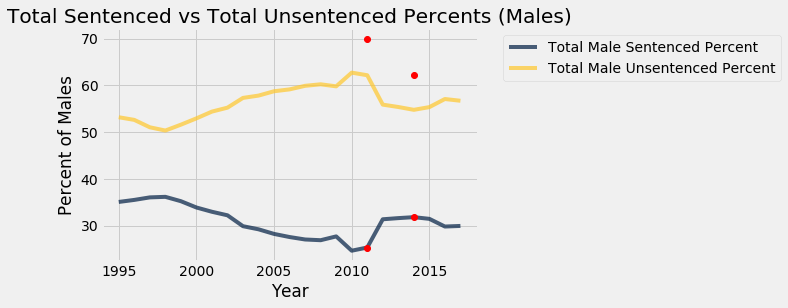

In [46]:
# Filtering data for just 2011 and 2014
data2011 = m_percent_totals.where("Year", 2011)
data2014 = m_percent_totals.where("Year", 2014)

# Create x and y coordinates for 2011
x_coordinate2011 = data2011.column('Year')
y_coordinate2011 = data2011.column("Total Male Sentenced Percent")

# Create x and y coordinates for 2014
x_coordinate2014 = data2014.column('Year')
y_coordinate2014 = data2014.column("Total Male Sentenced Percent")

# Base plot creation
m_percent_totals.plot("Year")

plt.title("Total Sentenced vs Total Unsentenced Percents (Males)")
plt.xlabel("Year")
plt.ylabel("Percent of Males")


# Adding our points
plt.plot(x_coordinate2011, y_coordinate2011, 'ro')
plt.plot(x_coordinate2014, y_coordinate2014, 'ro')
plt.plot(x_coordinate2011_un, y_coordinate2011_un, 'ro')
plt.plot(x_coordinate2014_un, y_coordinate2014_un, 'ro')

<font color = #d14d0f>**Question 10)**</font> Look at the two plots that you made specifically for males. What patterns do you notice? Is there anything interesting you notice related to the years/points we plotted?

*Replace this text with your response!*

#### Females: Sentenced vs. Unsentenced

Above we analyzed just the males that were sentenced and unsentenced. Now we will do the same with females. Because the process is exactly similar to what we've done before we will simply have you run the code cells to generate the plots and focus on analysis instead!

Text(0, 0.5, 'Number of Females')

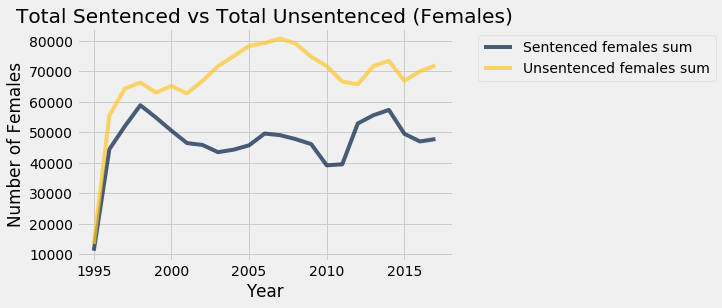

In [48]:
# First, we create a table with only female information:
females = data_year.select('Year', 'Sentenced females sum', 'Unsentenced females sum')

# Next, we generate a plot that shows the number of both sentenced and unsentenced 
# females over the years.
females.plot('Year')

plt.title("Total Sentenced vs Total Unsentenced (Females)")
plt.xlabel("Year")
plt.ylabel("Number of Females")

<font color = #d14d0f>**Question 11)**</font> What do you notice about this plot compared to the related males plot? Make sure you are comparing the correct graphs. This plot does not deal with percentages!

*Replace this text with your response!*

---
We can also calculate the percentages of sentenced females and unsentenced females and plot this relationship.

In [49]:
# First, store necessary data in new variables for future use
female_sent = females.column('Sentenced females sum')
female_unsent = females.column('Unsentenced females sum')

# Then calculate percentages:
f_sent_percent = (female_sent / total_adp) * 100
f_unsent_percent = (female_unsent / total_adp) * 100

# Finally, add the new variables to our table and select relevant columns for plotting:
females = females.with_columns(
    "Total Female Sentenced Percent", f_sent_percent,
    "Total Female Unsentenced Percent", f_unsent_percent)

f_percent_totals = females.select('Year', 'Total Female Sentenced Percent', 'Total Female Unsentenced Percent')
f_percent_totals

Year,Total Female Sentenced Percent,Total Female Unsentenced Percent
1995,5.35384,6.4191
1996,5.25896,6.57364
1997,5.75361,7.11964
1998,6.32477,7.12656
1999,6.11041,7.02014
2000,5.73295,7.39388
2001,5.35973,7.23554
2002,5.08828,7.41998
2003,4.81506,7.93463
2004,4.80112,8.12072


Using these three columns, we can plot the percentages for females as well as add the red dots on the years 2011 and 2014.

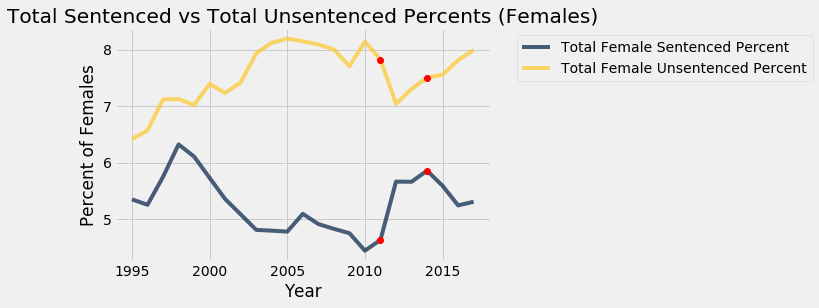

In [50]:
# Select years of interest
data2011 = f_percent_totals.where("Year", 2011)
data2014 = f_percent_totals.where("Year", 2014)

# Get the coordinates for the Year 2011 for the Total Female Sentenced Percent 
x_coordinate2011 = data2011.column('Year')
y_coordinate2011 = data2011.column("Total Female Sentenced Percent")

# Get the coordinates for the Year 2014 for the Total Female Sentenced Percent 
x_coordinate2014 = data2014.column('Year')
y_coordinate2014 = data2014.column("Total Female Sentenced Percent")

# Get the coordinates for the Year 2011 for the Total Female Unsentenced Percent 
x_coordinate2011_un = data2011.column('Year')
y_coordinate2011_un = data2011.column("Total Female Unsentenced Percent")

# Get the coordinates for the Year 2014 for the Total Female Unsentenced Percent 
x_coordinate2014_un = data2014.column('Year')
y_coordinate2014_un = data2014.column("Total Female Unsentenced Percent")

# Plot 
f_percent_totals.plot("Year")
plt.title("Total Sentenced vs Total Unsentenced Percents (Females)")
plt.xlabel("Year")
plt.ylabel("Percent of Females")

# Add red dots
plt.plot(x_coordinate2011, y_coordinate2011, 'ro')
plt.plot(x_coordinate2014, y_coordinate2014, 'ro')
plt.plot(x_coordinate2011_un, y_coordinate2011_un, 'ro')
plt.plot(x_coordinate2014_un, y_coordinate2014_un, 'ro')

<font color = #d14d0f>**Question 12)**</font> Compare the totals plot (completed before) to the one you just created. What kind of story does this plot reveal?


*Replace this text with your response!*

<font color = #d14d0f>**Question 13)**</font> Given the last graph from the previous notebook, compare your final results to the ones presented here. What story do these two data sets (Prisons and Jails) tell you when you look at them side by side? How do they show the impact of realignment? The graph is shown below.

<img src='./data/lecture1_finalgraph.png'>

*Replace this text with your response!*

Thank you for taking the time to complete the first notebook! We hope you found it useful and insightful.

---
# <font color = #d14d0f>Final Survey</font> <a id='section3'></a>

Congrats! You've finished the final Jupyter Notebook assignment! The Division of Data Sciences and Information would like to ask you to please fill this survey out as a part of your assignment. We would like to improve the module for future semesters, and would really appreciate it if you took the time to fill this out so we can better serve you!

Please make sure you are logged into your Berkeley (.edu) email address to access the form.

[Survey Link](https://forms.gle/iYB2D41RggxdSo7F8)

Alternatively, please copy and paste this link into your URL bar:https://forms.gle/iYB2D41RggxdSo7F8

---

## Saving the Notebook as an PDF

Congrats on finishing this notebook! As mentioned before, you will be submitting this notebook as an PDF file. To turn in this assignment please follow the steps below:

1. **Important:** Click the Save icon located at the far left on the top toolbar. Make sure to do this before following the next steps. You can also click 'File' > 'Save and Checkpoint'.
2. Run the code cell below:
    * There is no need to edit the code cell.
    * If no file automatically downloads or opens in another tab that is viewable, **right click on the link generated and save it.**
5. Once the file downloads, open it using a PDF reader to make sure that everything looks okay.

In [ ]:
Notebook.export("Lecture_2.ipynb", filter_type="tags")

---
Notebook developed by: Ashley Quiterio, Shalini Kunapuli, Alma Pineda, and William McEachen

Data Science Modules: http://data.berkeley.edu/education/modules

